# Done in Jupyter Notebook With GPU of 8 Gb.

In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import time


In [2]:
#pip install model_profiler
from model_profiler import model_profiler

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
from keras.preprocessing import image

In [5]:
batch_size_val = 32
img_height = 224
img_width = 224
epochs_size = 10
class_label = [ "paper","rock" , "scissors"]

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='int',
    class_names=class_label,
    color_mode='rgb',
    batch_size=batch_size_val,
    image_size=(img_height, img_width),
)

Found 2520 files belonging to 3 classes.


In [7]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels='inferred',
    label_mode='int',
    class_names=class_label,
    color_mode='rgb',
    batch_size=batch_size_val,
    image_size=(img_height, img_width),
    shuffle=True,

)

Found 372 files belonging to 3 classes.


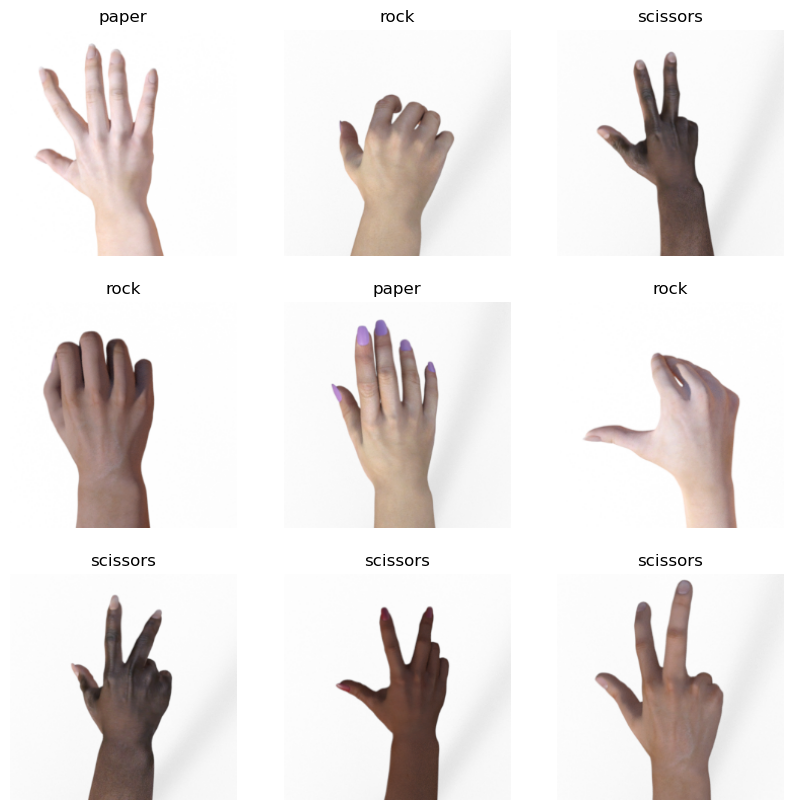

In [8]:
import matplotlib.pyplot as plt
class_names = test_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 79
Test size: 12


In [10]:
for X, y in train_ds:
  print(X.shape, y.numpy())
  image_1 = X.numpy()
  break

(32, 224, 224, 3) [2 0 1 1 1 2 0 1 1 0 1 2 2 0 1 2 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 2]


## AlexNet Model

In [11]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

inp = layers.Input((224, 224, 3))
x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(3, 2)(x)
x = layers.Conv2D(256, 5, 1, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(3, 2)(x)
x = layers.Conv2D(384, 3, 1, activation='relu')(x)
x = layers.Conv2D(384, 3, 1, activation='relu')(x)
x = layers.Conv2D(256, 3, 1, activation='relu')(x)
x = layers.MaxPooling2D(3, 2)(x)
x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(3, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=x)

In [12]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 54, 54, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 22, 22, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │          12,291 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,594,883 (82.38 MB)

 Trainable params: 21,594,179 (82.38 MB)

 Non-trainable params: 704 (2.75 KB)

In [13]:
history=model.fit(
    train_ds,
    epochs=epochs_size,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.4267 - loss: 1.0892 - val_accuracy: 0.4274 - val_loss: 1.0058
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.7151 - loss: 0.7495 - val_accuracy: 0.6613 - val_loss: 0.7543
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.8937 - loss: 0.4089 - val_accuracy: 0.8683 - val_loss: 0.4565
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.9606 - loss: 0.2217 - val_accuracy: 0.6532 - val_loss: 0.7474
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.9751 - loss: 0.1424 - val_accuracy: 0.8629 - val_loss: 0.3156
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9884 - loss: 0.0802

KeyboardInterrupt: 

## Saving Model

In [15]:
model.save('alexnet_model.keras')

#model_size=86.4 Mb

## Load Model

In [15]:
model = tf.keras.models.load_model('alexnet_model.keras')
# print('Validation Accuracy Score = ',np.max(history.history['val_accuracy']))

# print('Accuracy Score = ',np.max(history.history['accuracy']))


profile = model_profiler(model, 32)

print(profile)


AttributeError: 'Conv2D' object has no attribute 'output_shape'

In [16]:
## Reference : https://stackoverflow.com/questions/43469281/how-to-predict-input-image-using-trained-model-in-keras

## Converting Model to Tensor Flow lite. 

In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


# Save the model.
with open('tflite_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpw4r7sk7o/assets


INFO:tensorflow:Assets written to: /tmp/tmpw4r7sk7o/assets
2024-03-21 01:54:45.931479: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-03-21 01:54:45.931521: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-03-21 01:54:45.931807: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpw4r7sk7o
2024-03-21 01:54:45.935072: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-03-21 01:54:45.935104: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpw4r7sk7o
2024-03-21 01:54:45.950989: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-03-21 01:54:46.518295: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpw4r7sk7o
2024-03-21 01:54:46.551074: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

In [ ]:
(Reference : https://www.tensorflow.org/lite/models/convert/convert_models)

/tmp/tmpy_ku44fz/mobilenet/1/


In [30]:
tf.saved_model.save(tflite_model, 'saved_tensor_file')
print("Saved")

s


In [ ]:
#size of tflite model of alexnet=45.6 Mb

## After optimization

In [33]:
import tensorflow as tf
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
with open('lite_model_optimized.tflite', 'wb') as f:
  f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmp28w9u8jl/assets


INFO:tensorflow:Assets written to: /tmp/tmp28w9u8jl/assets
2024-03-21 01:56:32.871035: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-03-21 01:56:32.871076: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-03-21 01:56:32.871340: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp28w9u8jl
2024-03-21 01:56:32.874752: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-03-21 01:56:32.874778: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmp28w9u8jl
2024-03-21 01:56:32.900790: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-03-21 01:56:33.140367: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmp28w9u8jl
2024-03-21 01:56:33.178709: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

In [ ]:
#size of optimised tflite model of alexnet=20.2 Mb



## Running Tensor flow lite model 

In [34]:
import tensorflow_datasets as tfds
import tensorflow as tf
import tensorflow_datasets as tfds

builder = tfds.ImageFolder('dataset/')
#print(builder.info)  # num examples, labels... are automatically calculated
test_examples  = builder.as_dataset(split='test',shuffle_files=True, as_supervised=True )
#tfds.show_examples(test_examples, builder.info)  

2024-03-21 01:56:48.388472: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


In [36]:
 

def format_image(image, label):
    
    image = tf.image.resize(image, (224, 224)) 
    #print(image.dtype)
    return image, label
test_batches = test_examples.map(format_image).batch(1)

In [39]:


def test_lite_mode(filename):
    flag=0
    test_image_number = 374
    #test_image_number=15
    prediction_classes= []
    percentage_prediction = []
    actual_classes = []
    test_imgs = []
    tqdm._instances.clear()
#interpreter.allocate_tensors()
    
    interpreter = tf.lite.Interpreter(model_path=filename)
    interpreter.allocate_tensors()
    
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]
    print("Input Shape:", interpreter.get_input_details()[0]["shape"])
    #print("Input Type:", interpreter.get_input_details()[0]['dtype'])
    
    
    i=0
    for img, label in tqdm(test_batches.take(test_image_number)):
        i = i+1
        interpreter.set_tensor(input_index, img)
        interpreter.invoke()
        
        
        class_label2 = ["paper" , "rock" , "scissors"]
        
        #print("Acutal " ,label.numpy()[0] ,class_label2[label.numpy()[0] ] )
        #print(interpreter.get_tensor(output_index))
        
        index = np.argmax(interpreter.get_tensor(output_index))
        #print("Label Predicted " ,index , class_label[index])
        #print("\n")
        
        prediction_classes.append(index)

        if(flag==0):
            
            start_time =  time.time()
            percentage_prediction.append(np.max(interpreter.get_tensor(output_index)))
            
            end_time = time.time()
    
            inference_time = end_time - start_time
            print(f"Inference time: {inference_time:.7f} seconds")
            flag=1
        else :
            percentage_prediction.append(np.max(interpreter.get_tensor(output_index)))
            
        #print(classes)

        
        
        actual_classes.append(label.numpy()[0]);
        
        
        img =tf.image.resize(img, (224, 224)) / 255.0
        test_imgs.append(img)
        # plt.figure(figsize=(6,3))
        # plt.subplot(1,2,1)
        # plt.imshow(img, cmap=plt.cm.binary)

       # plt.figure(figsize=(6,3))
       # plt.subplot(1,2,1)
       # plot_image(index, predictions, test_labels, test_imgs)
       # plt.show()

    acc = accuracy_score(prediction_classes, actual_classes)
    print('Test accuracy is ' , acc)

    # for index in range(0,10):
    #   #plt.figure(figsize=(15,15))
    #   plt.subplot(5,3,index+1)
    #   plot_image(index, prediction_classes, actual_classes, test_imgs)


    plt.figure(figsize=(10, 10))
    #for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img  = np.squeeze(test_imgs[i])

        #plt.imshow(img, cmap=plt.cm.binary)

        if (prediction_classes[i] == actual_classes[i]):
            color = 'green'
        else:
            color = 'red'

        true_label_name = class_label[actual_classes[i]]
        predict_label_name = class_label[prediction_classes[i]]
        
        plt.imshow(img)
        #plt.title(class_names[actual_classes[i]])
        plt.xlabel("{} {:2.0f}% ({})".format(predict_label_name,
                                         100*percentage_prediction[i],
                                          true_label_name), color=color)
        
        

    
# set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.3, 
                    top=0.9, 
                    hspace=0.4)
    plt.show()


Input Shape: [  1 224 224   3]


  0%|                                           | 1/372 [00:00<00:51,  7.23it/s]

Inference time: 0.0000374 seconds


100%|█████████████████████████████████████████| 372/372 [00:14<00:00, 25.84it/s]


Test accuracy is  0.9086021505376344


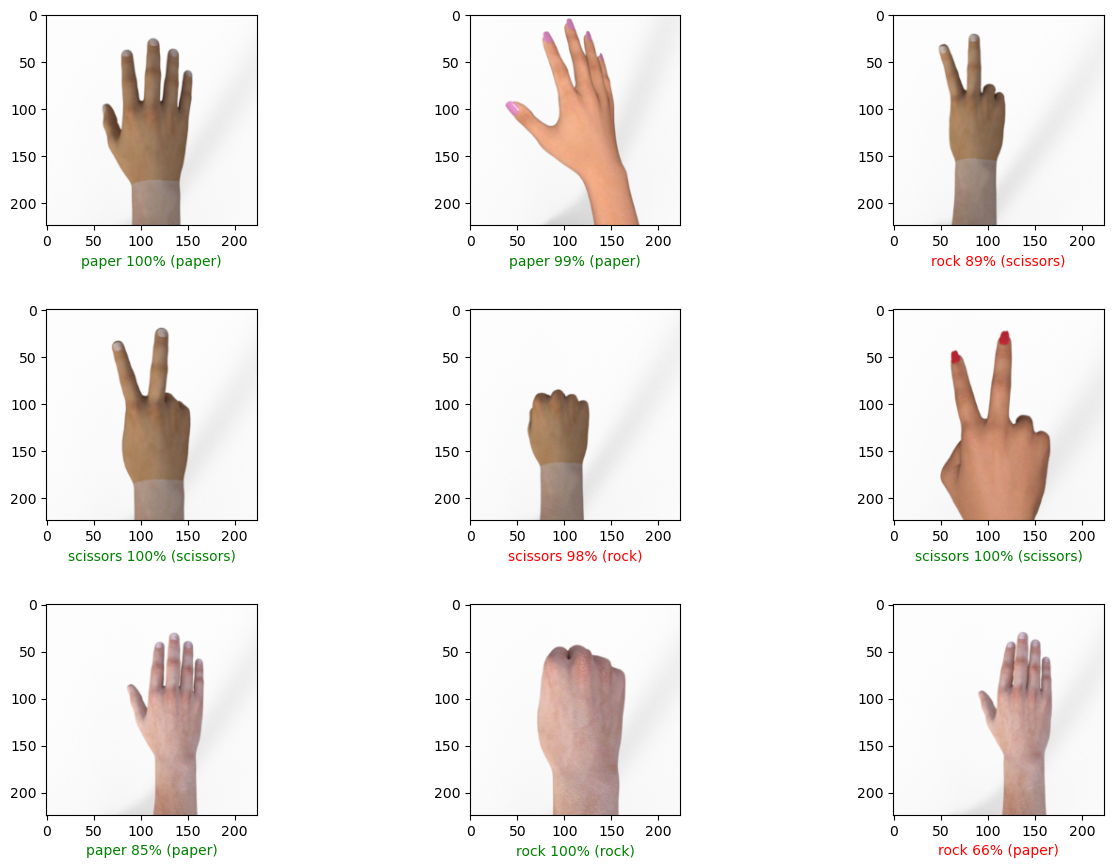

In [40]:
test_lite_mode('lite_model.tflite')


Input Shape: [  1 224 224   3]


  0%|                                           | 1/372 [00:00<00:40,  9.15it/s]

Inference time: 0.0000381 seconds


100%|█████████████████████████████████████████| 372/372 [00:17<00:00, 21.08it/s]


Test accuracy is  0.9086021505376344


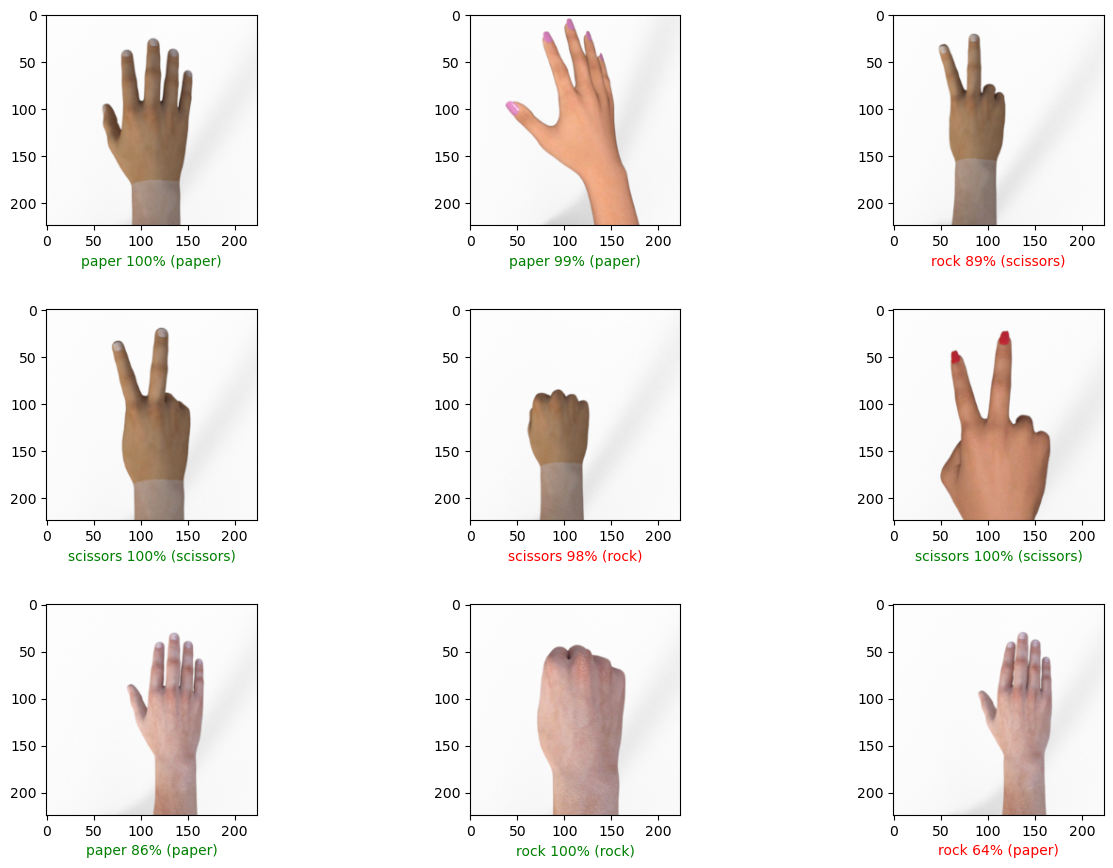

In [41]:
test_lite_mode('lite_model_optimized.tflite')

## MobilNetV2 



In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random
import keras

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', keras.__version__)

Python version: 3.11.5
Tensorflow version: 2.16.1
Keras version: 3.1.0


In [5]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

In [6]:
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

In [7]:
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='tmp\\rock_paper_scissors\\3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

In [8]:
NUM_TRAIN_EXAMPLES = dataset_info.splits['train'].num_examples
NUM_TEST_EXAMPLES = dataset_info.splits['test'].num_examples
NUM_CLASSES = dataset_info.features['label'].num_classes

In [9]:
INPUT_IMG_SIZE_ORIGINAL = dataset_info.features['image'].shape[0]
INPUT_IMG_SHAPE_ORIGINAL = dataset_info.features['image'].shape

# For Mobilenet v2 possible input sizes are [96, 128, 160, 192, 224].
INPUT_IMG_SIZE_REDUCED = 128
INPUT_IMG_SHAPE_REDUCED = (
    INPUT_IMG_SIZE_REDUCED,
    INPUT_IMG_SIZE_REDUCED,
    INPUT_IMG_SHAPE_ORIGINAL[2]
)

# Here we may switch between bigger or smaller image sized that we will train our model on.
INPUT_IMG_SIZE = INPUT_IMG_SIZE_REDUCED
INPUT_IMG_SHAPE = INPUT_IMG_SHAPE_REDUCED

print('Input image size (original):', INPUT_IMG_SIZE_ORIGINAL)
print('Input image shape (original):', INPUT_IMG_SHAPE_ORIGINAL)
print('\n')
print('Input image size (reduced):', INPUT_IMG_SIZE_REDUCED)
print('Input image shape (reduced):', INPUT_IMG_SHAPE_REDUCED)
print('\n')
print('Input image size:', INPUT_IMG_SIZE)
print('Input image shape:', INPUT_IMG_SHAPE)

Input image size (original): 300
Input image shape (original): (300, 300, 3)


Input image size (reduced): 128
Input image shape (reduced): (128, 128, 3)


Input image size: 128
Input image shape: (128, 128, 3)


In [10]:
base_model = tf.keras.applications.MobileNetV2(
  input_shape=INPUT_IMG_SHAPE,
  include_top=False,
  weights='imagenet',
  pooling='avg'
)

In [11]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  155


In [14]:
# Fine tune from this layer onwards.
fine_tune_at = 145

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False
    
# Compile the model using a much-lower training rate.
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
base_model.compile(
    optimizer = rmsprop_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

base_model.summary()

Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 64, 64, 32)        │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 64, 64, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 64, 64, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 64, 64, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 64, 64, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 64, 64, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 64, 64, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 64, 64, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 64, 64, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 64, 64, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 64, 64, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 65, 65, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 32, 32, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 730,560 (2.79 MB)

 Non-trainable params: 1,527,424 (5.83 MB)

In [15]:
fine_tuning_epochs = 10

In [16]:
training_history_fine = base_model.fit(
    x=dataset_train_augmented_shuffled.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=initial_epochs + fine_tuning_epochs,
    initial_epoch=initial_epochs,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[tensorboard_callback],
    verbose=1
)

NameError: name 'dataset_train_augmented_shuffled' is not defined

In [ ]:
loss = training_history.history['loss'] + training_history_fine.history['loss']
val_loss = training_history.history['val_loss'] + training_history_fine.history['val_loss']

accuracy = training_history.history['accuracy'] + training_history_fine.history['accuracy']
val_accuracy = training_history.history['val_accuracy'] + training_history_fine.history['val_accuracy']

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Test set', linestyle='--')
plt.plot(
[initial_epochs, initial_epochs], 
plt.ylim(),
label='Start Fine Tuning',
linestyle='--'
)
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(accuracy, label='Training set')
plt.plot(val_accuracy, label='Test set', linestyle='--')
plt.plot(
[initial_epochs, initial_epochs], 
plt.ylim(),
label='Start Fine Tuning',
linestyle='--'
)
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()

In [ ]:
train_loss, train_accuracy = model.evaluate(
    x=dataset_train.batch(BATCH_SIZE).take(NUM_TRAIN_EXAMPLES)
)

test_loss, test_accuracy = model.evaluate(
    x=dataset_test.batch(BATCH_SIZE).take(NUM_TEST_EXAMPLES)
)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)
print('\n')
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

In [17]:
model_name = 'mobilenet_v2_model.keras'
base_model.save(model_name, save_format='keras')

In [ ]:
#size of MobileNetV2 model=21.8 Mb

# Conversion to Tflite

In [1]:
converter = tf.lite.TFLiteConverter.from_keras_model(base_model) #conversion to tflite model
tflite_model = converter.convert()

tf.saved_model.save(tflite_model, 'saved_tensor_file')
print("Saved")

# Save the model.
with open('tflite_model.tflite', 'wb') as f:
  f.write(tflite_model)

NameError: name 'tf' is not defined

In [ ]:
#size of tflite model of MobilnetV2 model=12.6 Mb

 # Optimization of MobilnetV2 model

In [ ]:
import tensorflow as tf
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
with open('lite_model_optimized.tflite', 'wb') as f:
  f.write(tflite_quant_model)

In [ ]:
#size of optimised tflite MobilNetV2 model=3.5 Mb

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import tensorflow_datasets as tfds

builder = tfds.ImageFolder('edge_dataset/')

test_examples  = builder.as_dataset(split='test',shuffle_files=True, as_supervised=True )
 

In [ ]:
def format_image(image, label):
    
    image = tf.image.resize(image, (224, 224)) 
    
    return image, label
test_batches = test_examples.map(format_image).batch(1)

In [ ]:
def test_lite_mode(filename):
    flag=0
    test_image_number = 374
    #test_image_number=15
    prediction_classes= []
    percentage_prediction = []
    actual_classes = []
    test_imgs = []
    tqdm._instances.clear()
#interpreter.allocate_tensors()
    
    interpreter = tf.lite.Interpreter(model_path=filename)
    interpreter.allocate_tensors()
    
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]
    print("Input Shape:", interpreter.get_input_details()[0]["shape"])
    #print("Input Type:", interpreter.get_input_details()[0]['dtype'])
    
    
    i=0
    for img, label in tqdm(test_batches.take(test_image_number)):
        i = i+1
        interpreter.set_tensor(input_index, img)
        interpreter.invoke()
        
        
        class_label2 = ["paper" , "rock" , "scissors"]
        
        #print("Acutal " ,label.numpy()[0] ,class_label2[label.numpy()[0] ] )
        #print(interpreter.get_tensor(output_index))
        
        index = np.argmax(interpreter.get_tensor(output_index))
        #print("Label Predicted " ,index , class_label[index])
        #print("\n")
        
        prediction_classes.append(index)

        if(flag==0):
            
            start_time =  time.time()
            percentage_prediction.append(np.max(interpreter.get_tensor(output_index)))
            
            end_time = time.time()
    
            inference_time = end_time - start_time
            print(f"Inference time: {inference_time:.7f} seconds")
            flag=1
        else :
            percentage_prediction.append(np.max(interpreter.get_tensor(output_index)))
            
        #print(classes)

        
        
        actual_classes.append(label.numpy()[0]);
        
        
        img =tf.image.resize(img, (224, 224)) / 255.0
        test_imgs.append(img)
        # plt.figure(figsize=(6,3))
        # plt.subplot(1,2,1)
        # plt.imshow(img, cmap=plt.cm.binary)

       # plt.figure(figsize=(6,3))
       # plt.subplot(1,2,1)
       # plot_image(index, predictions, test_labels, test_imgs)
       # plt.show()

    acc = accuracy_score(prediction_classes, actual_classes)
    print('Test accuracy is ' , acc)

    # for index in range(0,10):
    #   #plt.figure(figsize=(15,15))
    #   plt.subplot(5,3,index+1)
    #   plot_image(index, prediction_classes, actual_classes, test_imgs)


    plt.figure(figsize=(10, 10))
    #for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img  = np.squeeze(test_imgs[i])

        #plt.imshow(img, cmap=plt.cm.binary)

        if (prediction_classes[i] == actual_classes[i]):
            color = 'green'
        else:
            color = 'red'

        true_label_name = class_label[actual_classes[i]]
        predict_label_name = class_label[prediction_classes[i]]
        
        plt.imshow(img)
        #plt.title(class_names[actual_classes[i]])
        plt.xlabel("{} {:2.0f}% ({})".format(predict_label_name,
                                         100*percentage_prediction[i],
                                          true_label_name), color=color)
        
        

    
# set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.3, 
                    top=0.9, 
                    hspace=0.4)
    plt.show()

In [ ]:
test_lite_mode('lite_model.tflite')